In [27]:
!pip install wordcloud


  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158041 sha256=9ce4cc0609c4ef5a6d06db3a3d46e6c56953b809c025786d815851da14180eab
  Stored in directory: /Users/jeremiahkamama/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import string


import spacy
from spacy.lang.en import English
from spacy.tokens import Doc
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokenizer import Tokenizer


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import wordcloud
from wordcloud import WordCloud,ImageColorGenerator






In [2]:
wsb = pd.read_csv('/Users/jeremiahkamama/Desktop/Article Projects/Spacy-Analysis/data/reddit_wsb.csv')

wsb.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [3]:
wsb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38641 entries, 0 to 38640
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      38641 non-null  object 
 1   score      38641 non-null  int64  
 2   id         38641 non-null  object 
 3   url        38641 non-null  object 
 4   comms_num  38641 non-null  int64  
 5   created    38641 non-null  float64
 6   body       19244 non-null  object 
 7   timestamp  38641 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


In [4]:
#handling missing data
miss_val = wsb.isnull().sum()

miss_val[0:10]

title            0
score            0
id               0
url              0
comms_num        0
created          0
body         19397
timestamp        0
dtype: int64

In [5]:
cells = np.product(wsb.shape)
missing = miss_val.sum()

percentage_miss = (missing/cells)* 100

print(percentage_miss)

6.274747030356358


In [6]:
wsb.dropna()

,title,score,id,url,comms_num,created,body,timestamp
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10
...,...,...,...,...,...,...,...,...
38622,What Have I to Lose?!?!?!!? GME 2 MOON,130,lwx3sr,https://www.reddit.com/r/wallstreetbets/commen...,13,1.614816e+09,&#x200B;\n\nhttps://preview.redd.it/hexuezcw4u...,2021-03-04 01:54:44
38624,RKT and Morgan Stanley Discussion - My notes f...,105,lwx1e9,https://www.reddit.com/r/wallstreetbets/commen...,72,1.614816e+09,RKT as a tech platform / real estate doubled a...,2021-03-04 01:51:52
38626,$VG - Vonage Invester Day on Friday,18,lwwsq8,https://www.reddit.com/r/wallstreetbets/commen...,11,1.614815e+09,Vonage is the 2nd largest UCaaS (Unified Commu...,2021-03-04 01:41:49
38631,Old School Mentality... still holding GME. Why...,296,lwwoc4,https://www.reddit.com/r/wallstreetbets/commen...,46,1.614815e+09,"I don't know if I am an Ape, Autist or Retard....",2021-03-04 01:36:29


In [7]:
wsb.drop(columns=['id'])

,title,score,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...
38636,NCLH 💎🙌🚀🌕 YOLO update!!!,19,https://i.redd.it/v0k8a7s00uk61.png,5,1.614814e+09,NaN,2021-03-04 01:27:07
38637,Adding to $RKT 300 more to 1000 on morning pul...,59,https://i.redd.it/z0k1zy3nytk61.jpg,76,1.614814e+09,NaN,2021-03-04 01:19:25
38638,Started at 5k a few weeks ago. Now it’s time f...,44,https://i.redd.it/ih9442fkytk61.jpg,26,1.614814e+09,NaN,2021-03-04 01:19:01
38639,Posted yesterday about buying GME 104 @ $122.9...,864,https://i.redd.it/mor1g3z9ytk61.jpg,22,1.614813e+09,NaN,2021-03-04 01:17:22


In [10]:
nlp = spacy.load("en_core_web_sm")

In [11]:
wsb_title = wsb['title'].dropna()

wsb_title = wsb_title.head(10)
print(wsb_title)

0    It's not about the money, it's about sending a...
1    Math Professor Scott Steiner says the numbers ...
2                                      Exit the system
3    NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4    Not to distract from GME, just thought our AMC...
5                                  WE BREAKING THROUGH
6          SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE
7                                   THIS IS THE MOMENT
8    Currently Holding AMC and NOK - Is it retarded...
9    I have nothing to say but BRUH I am speechless...
Name: title, dtype: object


In [12]:
title = nlp(wsb_title[1])
print(title)

Math Professor Scott Steiner says the numbers spell DISASTER for Gamestop shorts


In [13]:
for token in title:
    print(token.text,token.pos_,token.dep_)

Math PROPN compound
Professor PROPN compound
Scott PROPN compound
Steiner PROPN nsubj
says VERB ROOT
the DET det
numbers NOUN nsubj
spell VERB ccomp
DISASTER NOUN dobj
for ADP prep
Gamestop PROPN compound
shorts NOUN pobj


In [29]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']


In [14]:
wsb_body = wsb['body'].dropna()
wsb_body = wsb_body.head()
print(wsb_body)

2     The CEO of NASDAQ pushed to halt trading “to g...
6     Hedgefund whales are spreading disinfo saying ...
7     Life isn't fair. My mother always told me that...
10     I believe right now is one of those rare oppo...
12    You guys are champs. GME... who would have tho...
Name: body, dtype: object


In [15]:
body = nlp(wsb_body[2])
print(body)

The CEO of NASDAQ pushed to halt trading “to give investors a chance to recalibrate their positions”.

[https://mobile.twitter.com/Mediaite/status/1354504710695362563](https://mobile.twitter.com/Mediaite/status/1354504710695362563)

Now SEC is investigating, brokers are disallowing buying more calls. This is the institutions flat out admitting they will change the rules to bail out the rich but if it happens to us, we get a “well shucks you should have known investing is risky! have you tried cutting out avocados and coffee, maybe doing Uber on the side?”

We may have collectively driven up enough sentiment in wall street to make other big players go long on GME with us (we do not have the money to move the stock as much as it did alone). we didn’t hurt wall street as a whole, just a few funds went down while others went up and profited off the shorts the same as us. The media wants to pin the blame on us.

It should be crystal clear that this is a rigged game by now. Its time to build

In [50]:
 
def text_clean(text):
    text = ""

    # Replacing Handlers with Empty String
    text = re.sub('@[^\s]+','',text)

    # Replacing URLs with Empty String
    text = re.sub(r"http\S+", "",text)

    # Remove all the special characters
    text = ' '.join(re.findall(r'\w+', text))

    # Replacing Single Characters with Empty String
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Removing Extra Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
 
 

In [51]:
 body = text_clean(body)

In [38]:
token_list = []
for token in body:
    token_list.append(token.text)

filter_sentence = []

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_punct == False:
        filter_sentence.append(word)

print(token_list)



['The', 'CEO', 'of', 'NASDAQ', 'pushed', 'to', 'halt', 'trading', '“', 'to', 'give', 'investors', 'a', 'chance', 'to', 'recalibrate', 'their', 'positions', '”', '.', '\n\n', '[', 'https://mobile.twitter.com/Mediaite/status/1354504710695362563](https://mobile.twitter.com/Mediaite/status/1354504710695362563', ')', '\n\n', 'Now', 'SEC', 'is', 'investigating', ',', 'brokers', 'are', 'disallowing', 'buying', 'more', 'calls', '.', 'This', 'is', 'the', 'institutions', 'flat', 'out', 'admitting', 'they', 'will', 'change', 'the', 'rules', 'to', 'bail', 'out', 'the', 'rich', 'but', 'if', 'it', 'happens', 'to', 'us', ',', 'we', 'get', 'a', '“', 'well', 'shucks', 'you', 'should', 'have', 'known', 'investing', 'is', 'risky', '!', 'have', 'you', 'tried', 'cutting', 'out', 'avocados', 'and', 'coffee', ',', 'maybe', 'doing', 'Uber', 'on', 'the', 'side', '?', '”', '\n\n', 'We', 'may', 'have', 'collectively', 'driven', 'up', 'enough', 'sentiment', 'in', 'wall', 'street', 'to', 'make', 'other', 'big', 'p

In [39]:
print(filter_sentence)

['The', 'CEO', 'of', 'NASDAQ', 'pushed', 'to', 'halt', 'trading', 'to', 'give', 'investors', 'a', 'chance', 'to', 'recalibrate', 'their', 'positions', '\n\n', 'https://mobile.twitter.com/Mediaite/status/1354504710695362563](https://mobile.twitter.com/Mediaite/status/1354504710695362563', '\n\n', 'Now', 'SEC', 'is', 'investigating', 'brokers', 'are', 'disallowing', 'buying', 'more', 'calls', 'This', 'is', 'the', 'institutions', 'flat', 'out', 'admitting', 'they', 'will', 'change', 'the', 'rules', 'to', 'bail', 'out', 'the', 'rich', 'but', 'if', 'it', 'happens', 'to', 'us', 'we', 'get', 'a', 'well', 'shucks', 'you', 'should', 'have', 'known', 'investing', 'is', 'risky', 'have', 'you', 'tried', 'cutting', 'out', 'avocados', 'and', 'coffee', 'maybe', 'doing', 'Uber', 'on', 'the', 'side', '\n\n', 'We', 'may', 'have', 'collectively', 'driven', 'up', 'enough', 'sentiment', 'in', 'wall', 'street', 'to', 'make', 'other', 'big', 'players', 'go', 'long', 'on', 'GME', 'with', 'us', 'we', 'do', 'no

/Users/jeremiahkamama/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jeremiahkamama/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


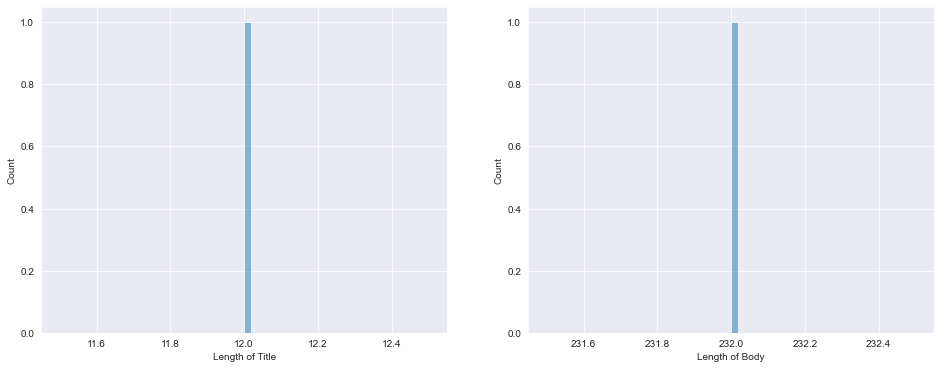

In [52]:
title_length = [len(title)]
body_length = [len(filter_sentence)]

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(16,6))
sns.histplot(title_length, bins=50, kde=True, ax= axis1)
sns.histplot(body_length, bins=50, kde=True, ax= axis2)

axis1.set_xlabel("Length of Title")
axis2.set_xlabel("Length of Body")

plt.show()